In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import os

from PIL import Image
from skimage import io, color, img_as_float, img_as_ubyte
from sklearn.model_selection import train_test_split


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torchvision.datasets import ImageFolder

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

!pip install torchinfo
from torchinfo import summary

!nvidia-smi

PyTorch Version:  1.7.1
Torchvision Version:  0.8.2
Thu Jan  5 15:38:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.34       Driver Version: 430.34       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  Off  | 00000000:19:00.0 Off |                  N/A |
| 24%   29C    P8     3W / 250W |   2074MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 24%   33C    P8     5W / 250W |     11MiB / 11019MiB |      0%      Default |
+-------------------------------+---

In [ ]:
!python --version

root_path = "/media/kondo/Ext4_for_Colab/tomizawa/paper/" #@param {type:"string"}
#@markdown  - Assign a path for your root directory. This root directory should include an image dataset directory ("/data/data_original/") and "/utils/" directory.
#@markdown  - The image dataset is available at a database (URL in #README on the GitHub).
#@markdown  - The library "utils" is available at the same GitHub page with this jupyter notebook.

%cd $root_path 
!pwd
!ls

Python 3.6.10 :: Anaconda, Inc.
/media/kondo/Ext4_for_Colab/tomizawa/paper
/media/kondo/Ext4_for_Colab/tomizawa/paper
data	   results	     results_centermask   results_randomResizedCrop
data_old1  results_Tak-1st   results_multilabels  results_test
figures    results_ablation  results_randomLabel  utils


In [ ]:
from utils.loaders import Args, ImageTransform, MarchantiaDataset, get_data, indices_to_loader
from utils.misc import get_unnormalize, get_datetime, makedirs, set_requires_grad_toFalse, train_model_pytorch_tutorial, compute_loss
from utils.misc import visualize_batch, plot_learning_trajectory, plot_learning_trajectory_semilogy, save_model_results, save_data_indices

In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(dev)

cuda


{'size_image': 224, 'batch_size': 32, 'root': './data/data_original/Aus/1d'}
Dataset ImageFolder
    Number of datapoints: 200
    Root location: ./data/data_original/Aus/1d
{'Aus_1d_F': 0, 'Aus_1d_M': 1}
{'n_train': 128, 'n_val': 32, 'n_test': 40}
40
[0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0
 0 0 1]


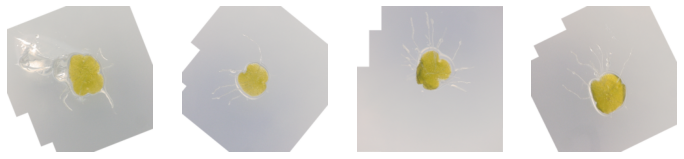

['weight', 'bias']
[Parameter containing:
tensor([[ 0.0034,  0.0161,  0.0068,  ...,  0.0061, -0.0031,  0.0144],
        [ 0.0069, -0.0163,  0.0174,  ..., -0.0195,  0.0187, -0.0154]],
       requires_grad=True), Parameter containing:
tensor([-0.0197,  0.0144], requires_grad=True)]
Epoch 0/499
----------
train Loss: 0.8263 Acc: 0.5156
val Loss: 1.0143 Acc: 0.5000

Epoch 10/499
----------
train Loss: 0.5878 Acc: 0.6797
val Loss: 0.5488 Acc: 0.8125

Epoch 20/499
----------
train Loss: 0.5584 Acc: 0.6875
val Loss: 0.5038 Acc: 0.8750

Epoch 30/499
----------
train Loss: 0.4620 Acc: 0.7969
val Loss: 0.5095 Acc: 0.8125

Epoch 40/499
----------
train Loss: 0.4474 Acc: 0.7969
val Loss: 0.4452 Acc: 0.8438

Epoch 50/499
----------
train Loss: 0.4256 Acc: 0.8125
val Loss: 0.4646 Acc: 0.8438

Epoch 60/499
----------
train Loss: 0.3949 Acc: 0.8203
val Loss: 0.4625 Acc: 0.8438

Epoch 70/499
----------
train Loss: 0.3375 Acc: 0.8906
val Loss: 0.4659 Acc: 0.8438

Epoch 80/499
----------
train Loss: 0.45

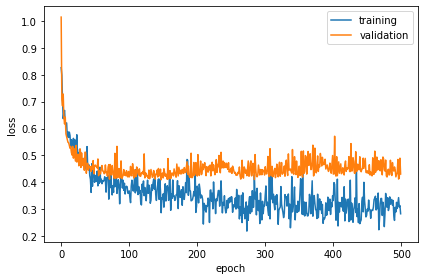

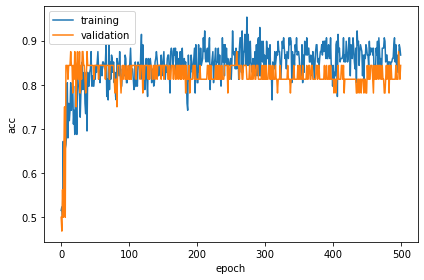

{'n_train': 128, 'n_val': 32, 'n_test': 40}
40
[1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0]


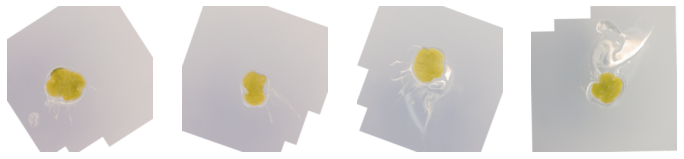

['weight', 'bias']
[Parameter containing:
tensor([[-0.0173, -0.0109,  0.0020,  ..., -0.0093,  0.0157,  0.0147],
        [ 0.0062, -0.0069,  0.0087,  ..., -0.0157, -0.0060,  0.0109]],
       requires_grad=True), Parameter containing:
tensor([0.0217, 0.0185], requires_grad=True)]
Epoch 0/499
----------
train Loss: 0.7934 Acc: 0.5078
val Loss: 0.8036 Acc: 0.5000

Epoch 10/499
----------
train Loss: 0.5664 Acc: 0.7422
val Loss: 0.5785 Acc: 0.7812

Epoch 20/499
----------
train Loss: 0.4843 Acc: 0.8203
val Loss: 0.5257 Acc: 0.7188

Epoch 30/499
----------
train Loss: 0.4875 Acc: 0.7578
val Loss: 0.5094 Acc: 0.7188

Epoch 40/499
----------
train Loss: 0.4581 Acc: 0.7812
val Loss: 0.4363 Acc: 0.8750

Epoch 50/499
----------
train Loss: 0.4340 Acc: 0.8047
val Loss: 0.4526 Acc: 0.8125

Epoch 60/499
----------
train Loss: 0.3745 Acc: 0.8828
val Loss: 0.4325 Acc: 0.8125

Epoch 70/499
----------
train Loss: 0.4932 Acc: 0.7109
val Loss: 0.3995 Acc: 0.8438

Epoch 80/499
----------
train Loss: 0.4061

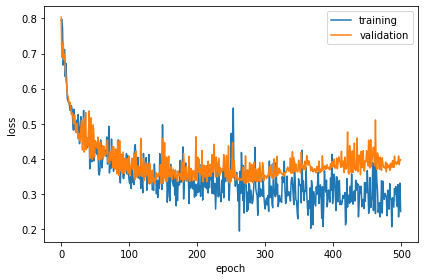

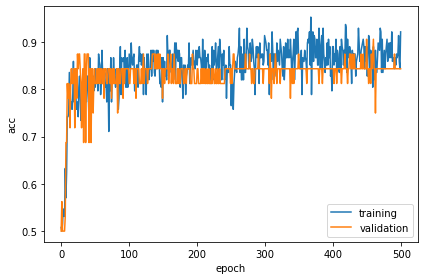

{'n_train': 128, 'n_val': 32, 'n_test': 40}
40
[1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0
 0 0 0]


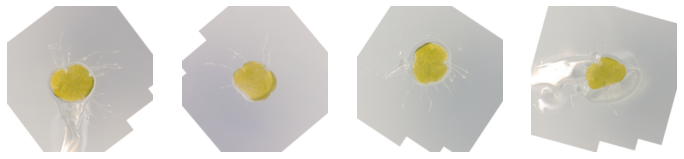

['weight', 'bias']
[Parameter containing:
tensor([[-0.0051, -0.0143, -0.0026,  ...,  0.0101, -0.0145, -0.0142],
        [ 0.0161,  0.0081, -0.0073,  ...,  0.0176,  0.0176,  0.0211]],
       requires_grad=True), Parameter containing:
tensor([-0.0218,  0.0155], requires_grad=True)]
Epoch 0/499
----------
train Loss: 0.8272 Acc: 0.4453
val Loss: 0.9426 Acc: 0.5000

Epoch 10/499
----------
train Loss: 0.5515 Acc: 0.7734
val Loss: 0.5679 Acc: 0.7812

Epoch 20/499
----------
train Loss: 0.4209 Acc: 0.8984
val Loss: 0.5110 Acc: 0.8125

Epoch 30/499
----------
train Loss: 0.4737 Acc: 0.7812
val Loss: 0.4950 Acc: 0.8438

Epoch 40/499
----------
train Loss: 0.3996 Acc: 0.8438
val Loss: 0.5127 Acc: 0.7812

Epoch 50/499
----------
train Loss: 0.3643 Acc: 0.9062
val Loss: 0.5169 Acc: 0.8125

Epoch 60/499
----------
train Loss: 0.3973 Acc: 0.8359
val Loss: 0.5474 Acc: 0.7500

Epoch 70/499
----------
train Loss: 0.3304 Acc: 0.8594
val Loss: 0.5756 Acc: 0.7188

Epoch 80/499
----------
train Loss: 0.36

In [ ]:
strains = ['Aus', 'Tak', 'RIL5']
days = ['1d']#['0d', '1d', '2d', '3d', '4d', '7d']
ablations = ['original_noScaleBar', 'binary', 'black-back', 'blur']
multilabel = False
results_dname = 'results_forGitHub'

args = Args()
for ablation in ablations:
  for strain in strains:
    for day in days:
      args.root = './data/data_' + ablation + '/' + strain + '/' + day
      print(args.__dict__)

      fill=255 if ablation=='original_noScaleBar' else 0
      Transform = ImageTransform(fill=fill)
      full_dataset = ImageFolder(root=args.root)
      print(full_dataset)
      print(full_dataset.class_to_idx)

      for n_loop in range(1): #5
        seed = n_loop + 1000000000
        train_loader, val_loader, test_loader, dataset_attributes, dataset_indices = get_data(args, full_dataset, Transform, MarchantiaDataset, seed=seed)
        print(dataset_attributes)
        print(len(test_loader.dataset))
        targets, train_indices, val_indices, test_indices = dataset_indices['targets'], dataset_indices['idx_train'], dataset_indices['idx_val'], dataset_indices['idx_test']
        print(targets[test_indices])
        dataloaders = {'train': train_loader, 'val': val_loader, 'test': test_loader}

        train_images, _ = next(iter(train_loader))
        unnormalize = get_unnormalize()
        visualize_batch(unnormalize(train_images)); plt.show()

        model = resnet50(pretrained=True)
        set_requires_grad_toFalse(model) ## set all parameter with requires_grad=False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, 2) ## requires_grad=True only in overwritten parameters
        print([name for name, _ in model.fc.named_parameters()])
        print([param for param in model.fc.parameters()])
        model.to(dev)
        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
        model, train_losses, train_accs, val_losses, val_accs = train_model_pytorch_tutorial(model, dataloaders, dev, criterion, optimizer, num_epochs=500, multilabel=multilabel)
        print(np.argmax(val_accs))
        _, val_acc = compute_loss(model, val_loader, dev, multilabel=multilabel)
        print('val_acc: ', val_acc)
        test_loss, test_acc = compute_loss(model, test_loader, dev)
        print('test acc', test_acc)

        ## save
        dt_now = get_datetime()
        print(args.root.split('/')[-2] + args.root.split('/')[-1])
        strain_day = args.root.split('/')[-2] + '_' + args.root.split('/')[-1]
        results_path = results_dname + '/' + dt_now + '_' + strain_day + '_' + ablation + '/'
        makedirs(results_path)

        ## .txt to save seed & epoch with max validation accuracy
        f = open(results_path + 'model_stats.txt', 'w')
        f.write('seed : ' + str(seed) + '\n')
        f.write('epoch with max val. acc. : ' + str(np.argmax(val_accs)) + '\n')
        f.close()

        figtype = 'learning_trajectory_'
        plot_learning_trajectory(train_losses, val_losses); plt.savefig(results_path + figtype + 'loss.png'); plt.show()
        plot_learning_trajectory(train_accs, val_accs, ylabel='acc'); plt.savefig(results_path + figtype + 'acc.png'); plt.show()

        save_model_results(results_path, dt_now, model, train_losses, train_accs, val_losses, val_accs, test_loss, test_acc)
        save_data_indices(results_path, train_indices, val_indices, test_indices)